

This code will load, preprocess, hyperparameter-tune, train, and evaluate an MLPClassifier on the breast cancer dataset

Data Loading and Preprocessing

In [9]:
import pandas as pd
from sklearn import datasets
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()

# Create a DataFrame from the dataset
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

# Add the target column
df["target"] = cancer.target

# Standardize the feature columns
columns_to_scale = cancer.feature_names
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Split the dataset into training and testing sets
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Hyperparameter Tuning with GridSearchCV

Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model. Hyperparameters are parameters that are not learned from the data but are set prior to training. Examples of hyperparameters for models like neural networks include the learning rate, the number of hidden layers, the number of neurons in each layer, and more.

GridSearchCV (Grid Search Cross-Validation) is a technique used to systematically search for the best combination of hyperparameters within a predefined range.

GridSearchCV is a valuable tool for hyperparameter optimization because it automates the search process and ensures that you explore a wide range of hyperparameter combinations. It helps you avoid manual trial-and-error tuning, saving time and effort.

 Here's how it works:

- Define Hyperparameter Grid: You specify a grid of hyperparameters and their possible values. For example, you can specify different values for learning rates, activation functions, and so on. This grid is a dictionary where keys are the hyperparameters, and values are lists of possible values for each hyperparameter.

- Model Selection: You choose a machine learning algorithm you want to tune, along with its initial configuration (if applicable). In your case, you chose the MLPClassifier (a type of neural network) with some initial hyperparameters.

- Cross-Validation: GridSearchCV performs cross-validation on your dataset. It splits the data into multiple subsets (folds), trains and validates the model on different subsets iteratively. This helps in obtaining more reliable performance estimates.

- Hyperparameter Search: GridSearchCV systematically goes through all possible combinations of hyperparameters from the defined grid. For each combination, it trains the model on the training data and evaluates it using cross-validation.

- Best Model Selection: After evaluating all combinations, GridSearchCV selects the combination of hyperparameters that resulted in the best performance metric (e.g., accuracy, F1-score) based on the cross-validation results.

- Final Model Training: The best hyperparameters are used to train a final model on the entire training dataset.

- Model Evaluation: Finally, you evaluate the performance of the tuned model on a separate test dataset to assess its generalization to new, unseen data.




GridSearchCV to search for the best hyperparameters for the MLPClassifier on the breast cancer dataset. The algorithm systematically tested different combinations of hidden layer sizes, activation functions, learning rates, solvers, and other hyperparameters to find the combination that yielded the best model performance.

In [3]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
parameters = {
    'hidden_layer_sizes': [(20,), (20, 10,), (10, 10,), (5, 5, 5,)],
    'activation': ['tanh', 'relu', 'logistic'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.001],
    'solver': ['sgd', 'adam'],
    'max_iter': [50, 100, 200]
}

# Create an MLPClassifier estimator
estimator = MLPClassifier(random_state=42,
                          n_iter_no_change=100,
                          early_stopping=True)

# Perform GridSearchCV for hyperparameter tuning
clf = GridSearchCV(estimator=estimator,
                   param_grid=parameters,
                   cv=10,
                   n_jobs=-1,
                   verbose=True)
clf.fit(X, y)


Fitting 10 folds for each of 288 candidates, totalling 2880 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10,
             estimator=MLPClassifier(early_stopping=True, n_iter_no_change=100,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'hidden_layer_sizes': [(20,), (20, 10), (10, 10),
                                                (5, 5, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.01, 0.001],
                         'max_iter': [50, 100, 200],
                         'solver': ['sgd', 'adam']},
             verbose=True)

In [4]:
clf.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (5, 5, 5),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_iter': 50,
 'solver': 'adam'}

In [5]:
clf.best_score_

0.9788847117794486

Model Training and Loss Curve

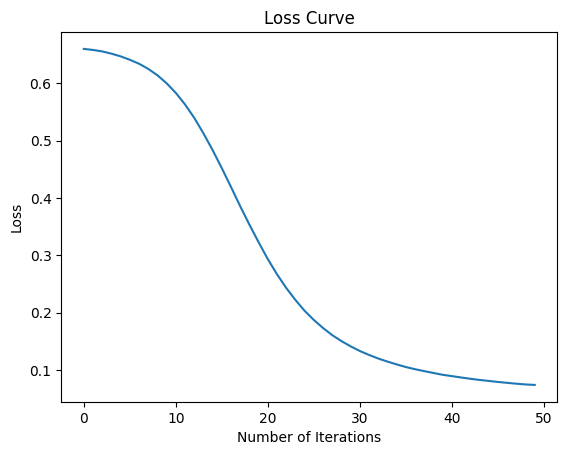

In [10]:
# Plot the loss curve
loss_curve = clf.best_estimator_.loss_curve_
plt.plot(loss_curve)
plt.title('Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()






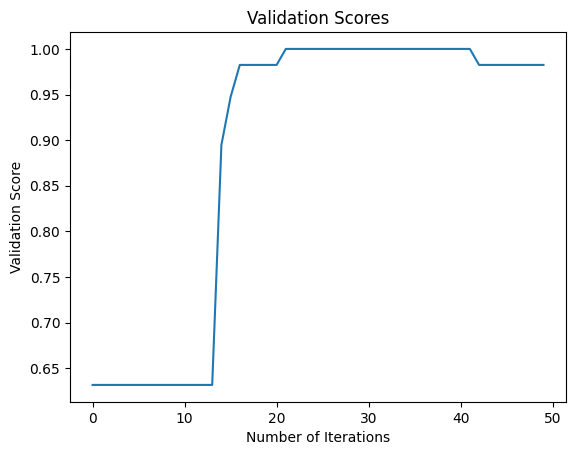

In [11]:
# Plot the validation scores
validation_scores = clf.best_estimator_.validation_scores_
plt.plot(validation_scores)
plt.title('Validation Scores')
plt.xlabel('Number of Iterations')
plt.ylabel('Validation Score')
plt.show()

Model Evaluation and Confusion Matrix

In [7]:
# Calculate and print the training and testing accuracy
train_accuracy = clf.best_estimator_.score(X_train, y_train)
test_accuracy = clf.best_estimator_.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# whithout hyperparameter tuning : Training Accuracy: 0.97 and Testing Accuracy: 0.98


Training Accuracy: 0.98
Testing Accuracy: 0.99


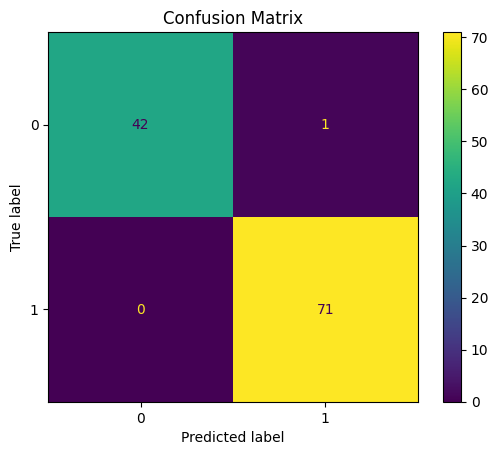

In [12]:
# Make predictions on the test data
predictions = clf.best_estimator_.predict(X_test)

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=clf.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.best_estimator_.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()